In [1]:
import numpy as np
from scipy import special
import netCDF4 as nc
import matplotlib.pyplot as plt
from util import fix_bounds

In [2]:
coarsePath= '/glade/work/adac/microHH/coarseData/'
coarse_finest = nc.Dataset(coarsePath+'coarse4x1026_Re1800.nc', 'r')
#coarse = nc.Dataset(coarsePath+'coarse4x2052_Re1800.nc', 'r')
#coarse = nc.Dataset(coarsePath+'coarse4x40104_Re1800.nc', 'r')

In [3]:
kmax = 64
zsize = 18.074844397670482
dz = zsize / kmax
z = np.linspace(0.5*dz, zsize-0.5*dz, kmax)
print(z)
# z_coarse=np.array(coarse_finest.variables["z"])
# #z_coarse=np.array(coarse.variables["z"])
# print(z_coarse)
save=False

[ 0.14120972  0.42362917  0.70604861  0.98846805  1.2708875   1.55330694
  1.83572638  2.11814583  2.40056527  2.68298472  2.96540416  3.2478236
  3.53024305  3.81266249  4.09508193  4.37750138  4.65992082  4.94234026
  5.22475971  5.50717915  5.7895986   6.07201804  6.35443748  6.63685693
  6.91927637  7.20169581  7.48411526  7.7665347   8.04895415  8.33137359
  8.61379303  8.89621248  9.17863192  9.46105136  9.74347081 10.02589025
 10.3083097  10.59072914 10.87314858 11.15556803 11.43798747 11.72040691
 12.00282636 12.2852458  12.56766525 12.85008469 13.13250413 13.41492358
 13.69734302 13.97976246 14.26218191 14.54460135 14.82702079 15.10944024
 15.39185968 15.67427913 15.95669857 16.23911801 16.52153746 16.8039569
 17.08637634 17.36879579 17.65121523 17.93363468]


In [4]:
itimeInit = 0
u_interp,z_interp = fix_bounds('u',coarse_finest,itimeInit,noslip=True,fix_bad_pad=True)
v_interp,_ = fix_bounds('v',coarse_finest,itimeInit,noslip=True,fix_bad_pad=False)
b_interp,_ = fix_bounds('b',coarse_finest,itimeInit,fix_bad_pad=False)

In [5]:
itimeFinal = 14
ul_interp,_ = fix_bounds('u',coarse_finest,itimeFinal,noslip=True,fix_bad_pad=True)
vl_interp,_ = fix_bounds('v',coarse_finest,itimeFinal,noslip=True,fix_bad_pad=False)
bl_interp,_ = fix_bounds('b',coarse_finest,itimeFinal,fix_bad_pad=False)

In [6]:
u = np.interp(z,z_interp,u_interp)
v = np.interp(z,z_interp,v_interp)
b = np.interp(z,z_interp,b_interp)
ul = np.interp(z,z_interp,ul_interp)
vl = np.interp(z,z_interp,vl_interp)
bl = np.interp(z,z_interp,bl_interp)
ug = np.zeros(kmax)
vg = np.zeros(kmax)
ug[:] = 0.049295030175465
vg[:] = 0.

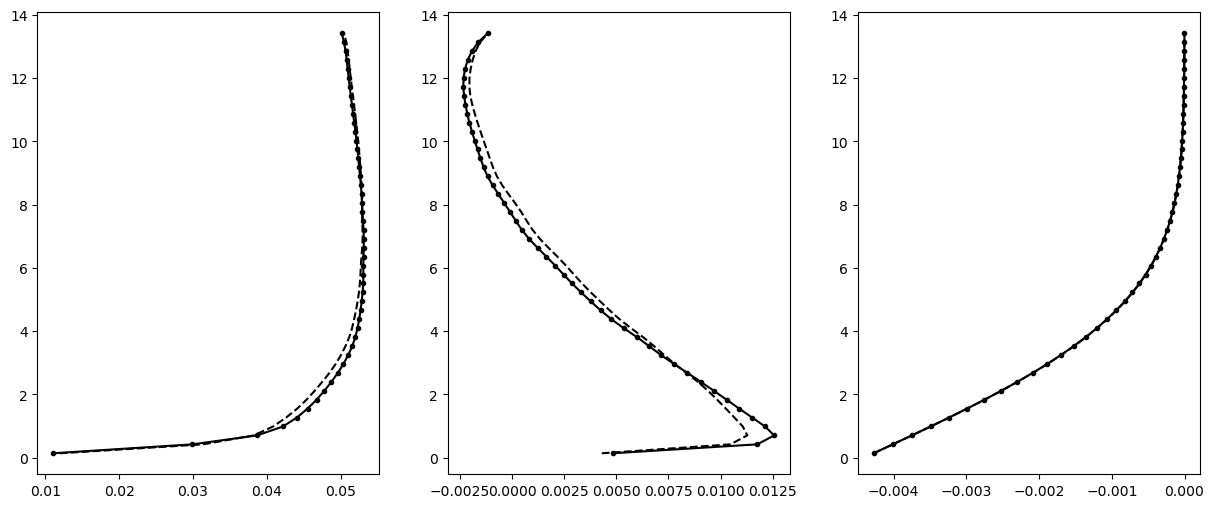

In [7]:
zstart=0
zend=int(3*kmax/4)

# del(fig,ax)
fig,ax = plt.subplots(1,3,figsize = (15,6))

# ax[0].plot(ug[zstart:zend],z[zstart:zend],'--',color='k',label=r'$u_g$')
ax[0].plot(u[zstart:zend],z[zstart:zend],'k--',label='Initialization')
ax[0].plot(ul[zstart:zend],z[zstart:zend],'k.-',label='DNS')

# ax[1].plot(vg[zstart:zend],z[zstart:zend],'--',color='k',label=r'$v_g$')
ax[1].plot(v[zstart:zend],z[zstart:zend],'k--',label='Initialization')
ax[1].plot(vl[zstart:zend],z[zstart:zend],'k.-',label='DNS')

ax[2].plot(b[zstart:zend],z[zstart:zend],'k--',label='Initialization')
ax[2].plot(bl[zstart:zend],z[zstart:zend],'k.-',label='DNS')


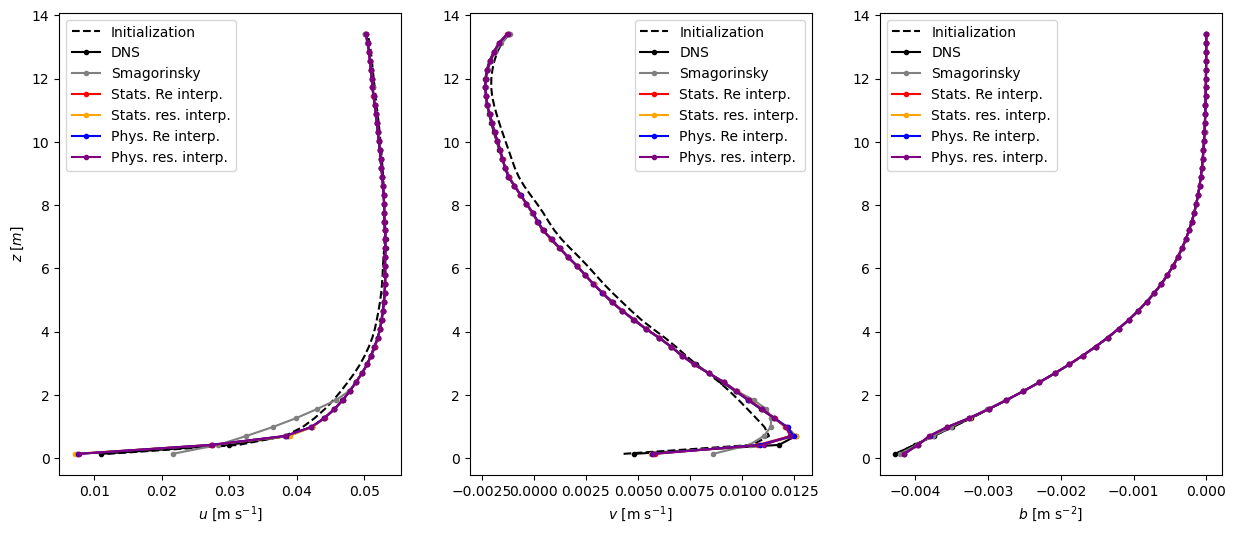

In [8]:
paths=['../cases/SBL_smag_midGridmidRe/','../cases/SBL_stats_midGridReInterp/', '../cases/SBL_stats_midReGridInterp/', '../cases/SBL_global_midGridReInterp/', '../cases/SBL_global_midReGridInterp/']
pathLabels=['Smagorinsky','Stats. Re interp.','Stats. res. interp.','Phys. Re interp.','Phys. res. interp.']
colors=['Grey','Red','Orange','Blue','Purple']
varStrings=['u','v','b']
varLabelStrings=[r'$u$ [m s$^{-1}$]',r'$v$ [m s$^{-1}$]',r'$b$ [m s$^{-2}$]']
itimes=[itimeFinal]

for ifile in range(len(paths)): #tdqm notebook just draws progress bar
    file=paths[ifile]+'SBL1800.default.0000000.nc'

    stats = nc.Dataset(file, 'r')
    default = stats.groups['default']
    thermo = stats.groups['thermo']

    z = stats.variables['z'][:]
        
    for iv,varStr in enumerate(varStrings):

        for itime in itimes:
            try: 
                var=thermo.variables[varStr][itime, :]
            except:
                var=default.variables[varStr][itime, :]
            #t = stats.variables['time'][itime]
            #ax[iv].plot(var[zstart:zend], z[zstart:zend],'.-',label=str(t))

            ax[iv].plot(var[zstart:zend], z[zstart:zend],'.-',color=colors[ifile],label=pathLabels[ifile])
        ax[iv].legend()
        ax[iv].set_xlabel(varLabelStrings[iv])#r'$b [m^2 s^{-2}]$')
    
    ax[0].set_ylabel(r'$z \; [m]$')
        

fig

In [9]:
save=True
if save:
    plt.figure(fig)
    fmts=["png","eps"]
    for fmt in fmts:
        plt.savefig("Profile_compareInitFinal_interp."+fmt, format=fmt)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
